# Tasca 6A: Visualització gràfica de Múltiples variables

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

warnings.filterwarnings('ignore')

## Nivell 1

- Exercici 1

Realitza la pràctica del punt 3.4 del notebook a GitHub "03 EXAMINING DATA" amb seaborn i el dataset "tips".

In [5]:
tips = pd.read_csv('./db/tips.csv', sep = ',', encoding = 'utf-8')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [9]:
print (f'Shape: {tips.shape}, Dimensions: {tips.ndim}')
print (f'Columns: {tips.columns}')

Shape: (244, 7), Dimensions: 2
Columns: Index(['total_bill', 'tip', 'sex', 'smoker', 'day', 'time', 'size'], dtype='object')


In [10]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

In [11]:
tips['tip_pct'] = round((tips['tip'] / (tips['total_bill'] - tips ['tip']))*100, 2)
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct
0,16.99,1.01,Female,No,Sun,Dinner,2,6.32
1,10.34,1.66,Male,No,Sun,Dinner,3,19.12
2,21.01,3.50,Male,No,Sun,Dinner,3,19.99
3,23.68,3.31,Male,No,Sun,Dinner,2,16.25
4,24.59,3.61,Female,No,Sun,Dinner,4,17.21


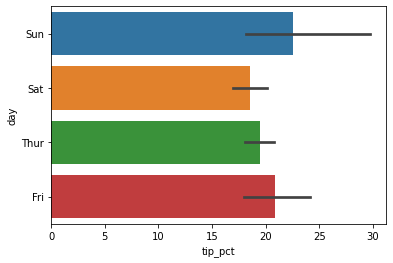

In [12]:
sns.barplot(x='tip_pct', y='day', data=tips, orient='h')
plt.show()

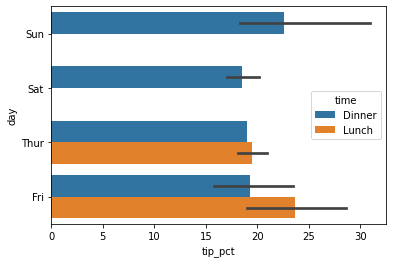

In [13]:
sns.barplot(x='tip_pct', y='day', hue='time', data=tips, orient='h')
plt.show()
sns.set(style="darkgrid")



In [14]:
tips.describe()

,total_bill,tip,size,tip_pct
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,20.212418
std,8.902412,1.383638,0.951100,16.338588
min,3.070000,1.000000,1.000000,3.700000
25%,13.347500,2.000000,2.000000,14.830000
50%,17.795000,2.900000,2.000000,18.310000
75%,24.127500,3.562500,3.000000,23.682500
max,50.810000,10.000000,6.000000,245.240000


In [15]:
round(tips.describe(include='all'),3)

,total_bill,tip,sex,smoker,day,time,size,tip_pct
count,244.000,244.000,244,244,244,244,244.000,244.000
unique,NaN,NaN,2,2,4,2,NaN,NaN
top,NaN,NaN,Male,No,Sat,Dinner,NaN,NaN
freq,NaN,NaN,157,151,87,176,NaN,NaN
mean,19.786,2.998,NaN,NaN,NaN,NaN,2.570,20.212
std,8.902,1.384,NaN,NaN,NaN,NaN,0.951,16.339
min,3.070,1.000,NaN,NaN,NaN,NaN,1.000,3.700
25%,13.348,2.000,NaN,NaN,NaN,NaN,2.000,14.830
50%,17.795,2.900,NaN,NaN,NaN,NaN,2.000,18.310
75%,24.127,3.562,NaN,NaN,NaN,NaN,3.000,23.682


In [16]:
tips.isnull().sum()/len(tips)

total_bill    0.0
tip           0.0
sex           0.0
smoker        0.0
day           0.0
time          0.0
size          0.0
tip_pct       0.0
dtype: float64

In [17]:
round((tips['tip']).describe(), 3)

count    244.000
mean       2.998
std        1.384
min        1.000
25%        2.000
50%        2.900
75%        3.562
max       10.000
Name: tip, dtype: float64

In [18]:
round(tips['tip'].median(), 3)

2.9

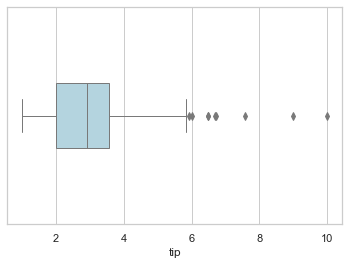

In [19]:
sns.set(style="whitegrid")
ax = sns.boxplot(x = tips['tip'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)

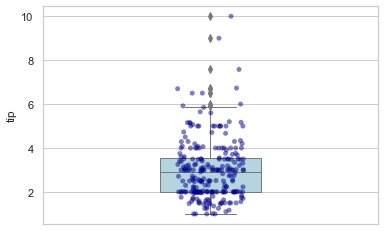

In [20]:
ax = sns.boxplot(y="tip", data=tips,  color='lightblue', fliersize=5,  orient='v', linewidth=1 , width=0.3)
ax = sns.stripplot(y=tips["tip"], orient='v', color='darkblue', alpha= 0.5)

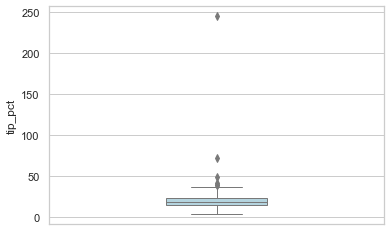

In [22]:
sns.boxplot(y="tip_pct", data=tips[tips.tip <10], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3);

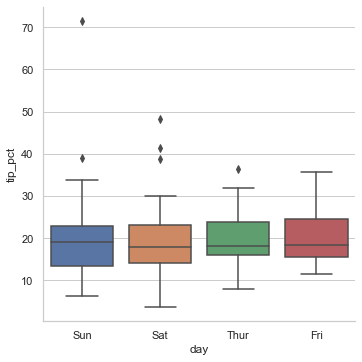

In [23]:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

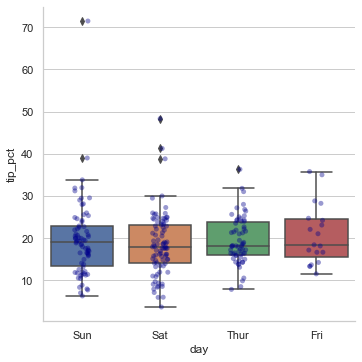

In [24]:
## añadimos variable categorica 'day' en x:
ax = sns.catplot(x='day', y='tip_pct', kind='box',
                 data=tips[tips.tip_pct < 245]);

ax = sns.stripplot(x='day', y='tip_pct', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

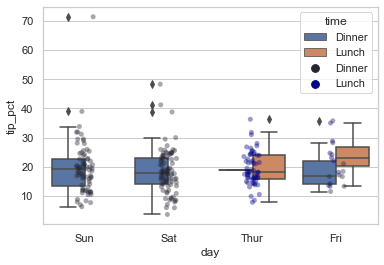

In [25]:
sns.boxplot(x='day', y='tip_pct', hue = 'time',
               data=tips[tips.tip_pct < 245]);
ax = sns.stripplot(x='day', y='tip_pct', hue='time', data=tips[tips.tip_pct < 245], orient='v', color='darkblue', alpha= 0.4);

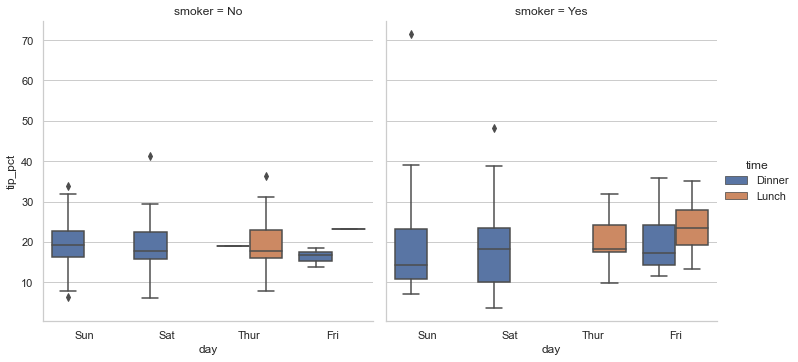

In [26]:
sns.catplot(x='day', y='tip_pct', hue='time', col='smoker',
               kind='box', data=tips[tips.tip_pct < 245]);

## Nivell 2

- Exercici 2

Repeteix l'exercici 1 amb el dataset que disposem en el repositori de GitHub PRE-PROCESSING-DATA, movies.dat

In [3]:
#Creem el dataframe i visualitzem com estàn disposades les dades
movies = pd.read_table('./db/movies.dat', sep='::', index_col=0, header=None, names=['Name', 'Genere'])
movies.head()

,Name,Genere
1,Toy Story (1995),Animation|Children's|Comedy
2,Jumanji (1995),Adventure|Children's|Fantasy
3,Grumpier Old Men (1995),Comedy|Romance
4,Waiting to Exhale (1995),Comedy|Drama
5,Father of the Bride Part II (1995),Comedy


In [4]:
# Fem un analisi rapid de la compossició del dataframe
print(f'Shape: {movies.shape}, Dimensions: {movies.ndim}')
print(f'Columns: {movies.columns}')
print(f'Dtypes:\n{movies.dtypes}')

Shape: (3883, 2), Dimensions: 2
Columns: Index(['Name', 'Genere'], dtype='object')
Dtypes:
Name      object
Genere    object
dtype: object


In [5]:
movies['Year'] = movies['Name'].str.extract(r'\(([0-9]*)\)') #Utilitzem regex per separar l'any del titol i fer una nova columna
movies['Year'] = movies['Year'].astype('int64') #cambiém el tipus de dades de la columna any perque siguin integers
movies['Name'] = movies['Name'].str.extract(r'(.*) \(') #Utilitzem regex per quedarnos amb el titol sense columna
movies.head()

,Name,Genere,Year
1,Toy Story,Animation|Children's|Comedy,1995
2,Jumanji,Adventure|Children's|Fantasy,1995
3,Grumpier Old Men,Comedy|Romance,1995
4,Waiting to Exhale,Comedy|Drama,1995
5,Father of the Bride Part II,Comedy,1995


In [6]:
# Separem els generes de la columna Genere en Genere principal i subgeneres

# Generem una llista de llistes iterant sobre la columna Genere y separant els elements per "|"  
subgen=[]
for item in movies['Genere']: 
    li=[]
    li = list(item.split("|"))
    subgen.append(li)
#Convertim la llista en un dataframe afegint els noms a les columnes
subgeneres_df = pd.DataFrame.from_records(subgen, columns=['Main_Gen','SubGen','SubGen2','SubGen3','SubGen4','SubGen5'])
subgeneres_df.head()

,Main_Gen,SubGen,SubGen2,SubGen3,SubGen4,SubGen5
0,Animation,Children's,Comedy,None,None,None
1,Adventure,Children's,Fantasy,None,None,None
2,Comedy,Romance,None,None,None,None
3,Comedy,Drama,None,None,None,None
4,Comedy,None,None,None,None,None


In [7]:
# Generem un nou dataframe concatenant els subgeneres al dataframe principal
movies_subgen = pd.concat([movies.reset_index(), subgeneres_df], axis=1)
movies_subgen = movies_subgen.set_index('index')
# Omplim els valors nuls amb "None"
movies_subgen = movies_subgen.fillna('None')
movies_subgen.head()

,Name,Genere,Year,Main_Gen,SubGen,SubGen2,SubGen3,SubGen4,SubGen5
index,,,,,,,,,
1,Toy Story,Animation|Children's|Comedy,1995,Animation,Children's,Comedy,None,None,None
2,Jumanji,Adventure|Children's|Fantasy,1995,Adventure,Children's,Fantasy,None,None,None
3,Grumpier Old Men,Comedy|Romance,1995,Comedy,Romance,None,None,None,None
4,Waiting to Exhale,Comedy|Drama,1995,Comedy,Drama,None,None,None,None
5,Father of the Bride Part II,Comedy,1995,Comedy,None,None,None,None,None


In [8]:
round(movies_subgen.describe(include='all'),2)

,Name,Genere,Year,Main_Gen,SubGen,SubGen2,SubGen3,SubGen4,SubGen5
count,3883,3883,3883.00,3883,3883,3883,3883,3883,3883
unique,3840,301,NaN,18,18,16,14,7,2
top,Hamlet,Drama,NaN,Drama,None,None,None,None,None
freq,5,843,NaN,1176,2025,3347,3768,3868,3882
mean,NaN,NaN,1986.07,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,16.90,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1919.00,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,1982.00,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,1994.00,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,1997.00,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
# Boxplot de la producció de pelicules al llarg del temps
sns.set(style="darkgrid")
ax = sns.boxplot(x = movies_subgen['Year'], color='lightblue', fliersize=5, orient='v', linewidth=1, width=0.3)
ax = sns.stripplot(x=movies3['Year'], orient='v', color='darkblue', alpha= 0.08)

NameError: name 'movies3' is not defined

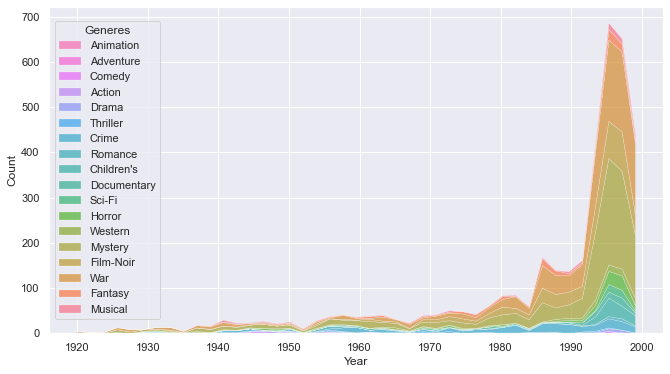

In [10]:
# Plotegem les dades del dataframe mostrant les pelicules produides per any i agrupades pel genere principal
fig, ax = plt.subplots()
sns.histplot(data=movies_subgen, x='Year', stat='count', hue='Main_Gen', alpha=0.7,element='poly', multiple='stack', linewidth=0.2)
fig.set_size_inches(11, 6)
ax.legend(movies_subgen['Main_Gen'].unique(),loc='center left', title='Generes')
plt.show()

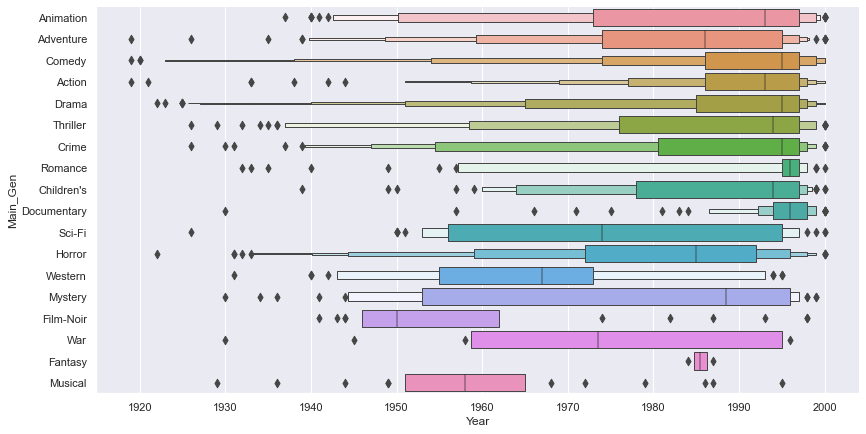

In [11]:
# Fem un nou grafic tipus boxplot n podem veure com varien els generes al llarg del temps
sns.catplot(y='Main_Gen', x='Year', kind='boxen', data=movies_subgen, linewidth=1, height=6, aspect=2)
plt.show()

## Nivell 3

- Exercici 3

Mostreu-me la teva creativitat, Sorprèn-me amb el dataset "movies.dat" del exercici anterior.

In [12]:
# Separem els generes de la collumna Genere per fer un llistat de tots es generes presents, independentment de la possició. 
genere_list = []
for item in movies['Genere']:
    li = list(item.split("|"))
    for genere in li: 
        if genere not in genere_list:
            genere_list.append(genere)

genere_list.sort()
genere_list

#definim una funció que per crear un dataframe amb dummy values (True or False) per a cada pelicula i genere. 
def is_genere (genere_list):
    is_movie_genere = {} 
    for item in genere_list:
        movie_li=[]
        li = []
        x = item
        is_movie_genere['Name'] = list(movies['Name'])
        for line in movies['Genere']:
                if x in line:
                    li.append(True)
                else: 
                    li.append(False)
        is_movie_genere[x] = li
    return pd.DataFrame.from_dict(is_movie_genere)


genere_db = is_genere(genere_list)
genere_db.head()

,Name,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,Jumanji,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,Grumpier Old Men,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,Waiting to Exhale,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,Father of the Bride Part II,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False


In [13]:
#Generem un nou dataframe unint el dataframe principal als dummy data
movies2 = movies.copy()
movies2.reset_index()
movies_dummy = movies2.merge(genere_db,how='right')
movies_dummy

,Name,Genere,Year,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,Toy Story,Animation|Children's|Comedy,1995,False,False,True,True,True,False,False,...,False,False,False,False,False,False,False,False,False,False
1,Jumanji,Adventure|Children's|Fantasy,1995,False,True,False,True,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,Grumpier Old Men,Comedy|Romance,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,True,False,False,False,False
3,Waiting to Exhale,Comedy|Drama,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
4,Father of the Bride Part II,Comedy,1995,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3978,Meet the Parents,Comedy,2000,False,False,False,False,True,False,False,...,False,False,False,False,False,False,False,False,False,False
3979,Requiem for a Dream,Drama,2000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3980,Tigerland,Drama,2000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3981,Two Family House,Drama,2000,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [14]:
# Eliminem els caracters especials de les categories Children's, Sci-Fi i Film-Noir
movies_dummy.rename(columns={"Children's": 'Children', 'Sci-Fi': 'SciFi', "Film-Noir":'Noir'}, inplace=True)
movies_dummy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3983 entries, 0 to 3982
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Name         3983 non-null   object
 1   Genere       3983 non-null   object
 2   Year         3983 non-null   int64 
 3   Action       3983 non-null   bool  
 4   Adventure    3983 non-null   bool  
 5   Animation    3983 non-null   bool  
 6   Children     3983 non-null   bool  
 7   Comedy       3983 non-null   bool  
 8   Crime        3983 non-null   bool  
 9   Documentary  3983 non-null   bool  
 10  Drama        3983 non-null   bool  
 11  Fantasy      3983 non-null   bool  
 12  Noir         3983 non-null   bool  
 13  Horror       3983 non-null   bool  
 14  Musical      3983 non-null   bool  
 15  Mystery      3983 non-null   bool  
 16  Romance      3983 non-null   bool  
 17  SciFi        3983 non-null   bool  
 18  Thriller     3983 non-null   bool  
 19  War          3983 non-null 

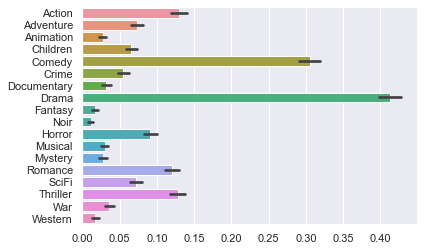

In [15]:
# Plot de barres de la ocurrença de cada genere: 
sns.barplot(data=movies_dummy.iloc[:,3:], orient='h')
plt.show()

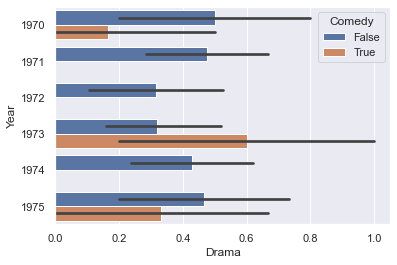

In [17]:
# Grafic que mostre les pelicules classficades con Drama entre 1970 i 1975 Separades per comedies o no comedies
sns.barplot(data=movies_dummy[(movies_dummy.Year <= 1975) & (movies_dummy.Year >= 1970)], x='Drama',y ='Year', orient='h', hue="Comedy")
plt.show()

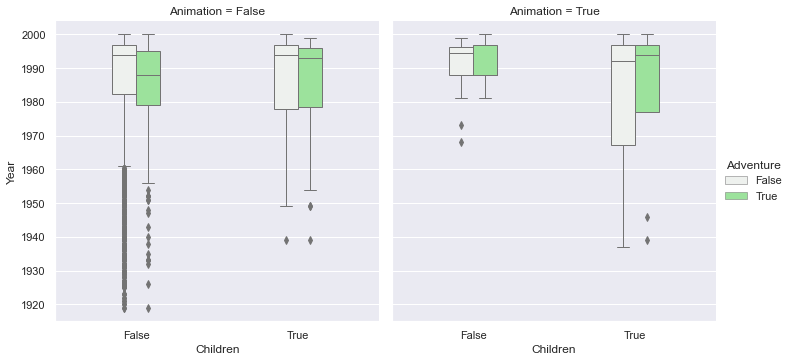

In [103]:
# Boxplot que mostra la produccio de pelicules infantils Westerns Separades per plelicules d'Animació i si sin o no d'aventures.
ax1 =sns.catplot(x="Children", y="Year", data=movies_dummy, color='lightgreen', orient='v', linewidth=1, width=0.3, hue='Adventure', kind='box', col='Animation')

In [28]:
generes_dummy = genere_db.drop('Name',axis=1)
generes_dummy

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,False,False,True,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,True,False,True,False,False,False,False,True,False,False,False,False,False,False,False,False,False
2,False,False,False,False,True,False,False,False,False,False,False,False,False,True,False,False,False,False
3,False,False,False,False,True,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3878,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
3879,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3880,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
3881,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


In [32]:
data = pd.DataFrame()
for genere in generes_dummy.columns: 
    series = generes_dummy[generes_dummy[genere] == 1].apply(np.sum)
    series.rename(genere, inplace=True)
    data= data.append(series)
data

,Action,Adventure,Animation,Children's,Comedy,Crime,Documentary,Drama,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
Action,503.0,128.0,4.0,13.0,65.0,55.0,0.0,100.0,15.0,0.0,25.0,3.0,12.0,35.0,107.0,133.0,46.0,10.0
Adventure,128.0,283.0,14.0,81.0,44.0,9.0,0.0,33.0,35.0,1.0,8.0,9.0,3.0,27.0,67.0,31.0,12.0,4.0
Animation,4.0,14.0,105.0,84.0,25.0,0.0,0.0,1.0,6.0,1.0,1.0,32.0,1.0,4.0,8.0,4.0,2.0,0.0
Children's,13.0,81.0,84.0,251.0,93.0,0.0,0.0,27.0,38.0,0.0,1.0,37.0,2.0,7.0,14.0,1.0,2.0,2.0
Comedy,65.0,44.0,25.0,93.0,1200.0,36.0,4.0,226.0,19.0,1.0,41.0,41.0,13.0,204.0,31.0,31.0,18.0,17.0
Crime,55.0,9.0,0.0,0.0,36.0,211.0,0.0,90.0,1.0,15.0,6.0,0.0,13.0,9.0,6.0,58.0,0.0,0.0
Documentary,0.0,0.0,0.0,0.0,4.0,0.0,127.0,4.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,1.0,0.0
Drama,100.0,33.0,1.0,27.0,226.0,90.0,4.0,1603.0,9.0,6.0,12.0,15.0,32.0,204.0,23.0,110.0,76.0,13.0
Fantasy,15.0,35.0,6.0,38.0,19.0,1.0,0.0,9.0,68.0,0.0,0.0,2.0,0.0,7.0,13.0,1.0,1.0,0.0
Film-Noir,0.0,1.0,1.0,0.0,1.0,15.0,0.0,6.0,0.0,44.0,1.0,0.0,8.0,1.0,2.0,20.0,0.0,0.0


In [61]:
# Generem la mascara
mask = np.triu(np.ones_like(data, dtype=bool), k=1)
mask

array([[False,  True,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False,  True,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False,  True,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False,  True,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False,  True,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],
       [False, False, False, False, False, False, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True,  True,  True],

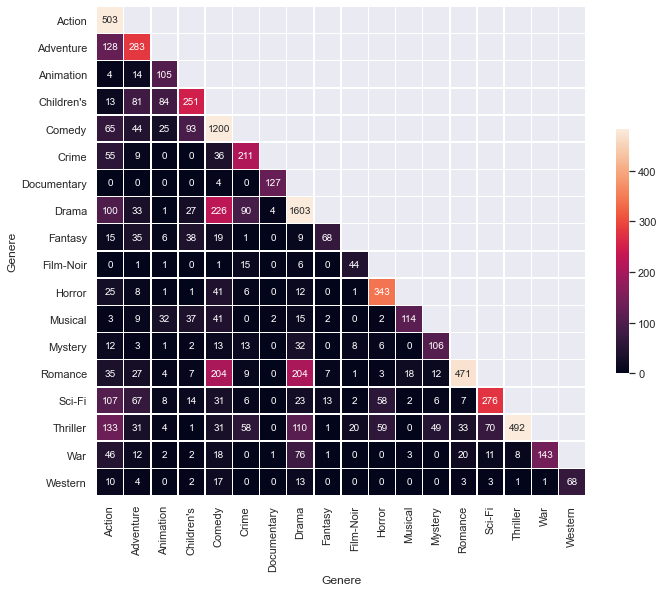

In [62]:
# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))
# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(data, mask=mask,annot=True, annot_kws={"size":10}, square=True, linewidths=.5, cbar_kws={"shrink": .5}, fmt='.0f', robust=True)
plt.xlabel("Genere")
plt.ylabel("Genere")
plt.show()